In [159]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

mat_content = sio.loadmat( 'face(1).mat' )

face_data = mat_content[ 'X' ]

face_data_labels = mat_content[ 'l' ]

print( 'Face Data Shape: {}'.format( face_data.shape ) )
print( 'Face Data Labels Shape: {}'.format( face_data_labels.shape ) )

faceDataLabeled = np.vstack( ( face_data, face_data_labels ) )

print( 'Face Data Labeled Shape: {}'.format( faceDataLabeled.shape ) )

Face Data Shape: (2576, 520)
Face Data Labels Shape: (1, 520)
Face Data Labeled Shape: (2577, 520)


In [160]:
#Randomized Train test Split 42
train_label, test_label = train_test_split( faceDataLabeled.T, test_size = 0.3, random_state = 3 )
#Stratified Train test Split
# train_label, test_label = train_test_split( face_data.T, stratify = face_data_labels, test_size= 0.2 )

train_label = train_label.T
test_label  = test_label.T

print( 'Shape of Train Set {}'.format( train_label.shape ) )
print( 'Shape of Test Set {}'.format( test_label.shape ) )

Shape of Train Set (2577, 364)
Shape of Test Set (2577, 156)


### Work out mean face

In [161]:
mean_face = np.mean( train_label[ : - 1 ], axis = 1)

(2576,)


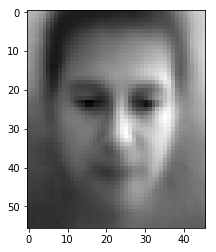

In [162]:
mean_face = np.mean( train_label[ : - 1 ], axis = 1) 
print(mean_face.shape)
mean_face_img = np.reshape(mean_face,(46,56))
plt.imshow( mean_face_img.T, cmap = 'gist_gray')

## High Dimension


In [163]:
#subtract the mean face
phi_mat = train_label[ : -1 ].astype( 'float64' )
for j in range(phi_mat.shape[1]):
    for i in range(phi_mat.shape[0]):
        phi_mat[i,j] = phi_mat[i,j] - mean_face[i]

A = phi_mat
print(A.shape)
#covirance matrix S
S = 1/A.shape[1] * np.dot(A,A.T)

eig_val, eig_vec = np.linalg.eig( S )

eig_pairs = [ ( np.abs( eig_val[ i ] ), eig_vec[ :, i ] ) for i in range( len( eig_val ) ) ]
eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

for i in range(10):
    print( eig_pairs[ i ][0] )
    
    #M largerst eigen pairs
M_eig_pairs = []
for i in eig_pairs:
    if( i[ 0 ] > 1 ):
        M_eig_pairs.append( i )
print( 'Original Eig_Pairs: {}'.format( len( eig_pairs ) ) )
print( 'Reduced Eig_Pairs: {}'.format( len( M_eig_pairs ) ) )

(2576, 364)
966750.8280675922
546425.3899067461
423803.4936578016
254176.36136491134
205853.10409155936
153478.3096187152
127704.33123494152
119226.16719247591
92379.17410352493
83318.77788945477
Original Eig_Pairs: 2576
Reduced Eig_Pairs: 363


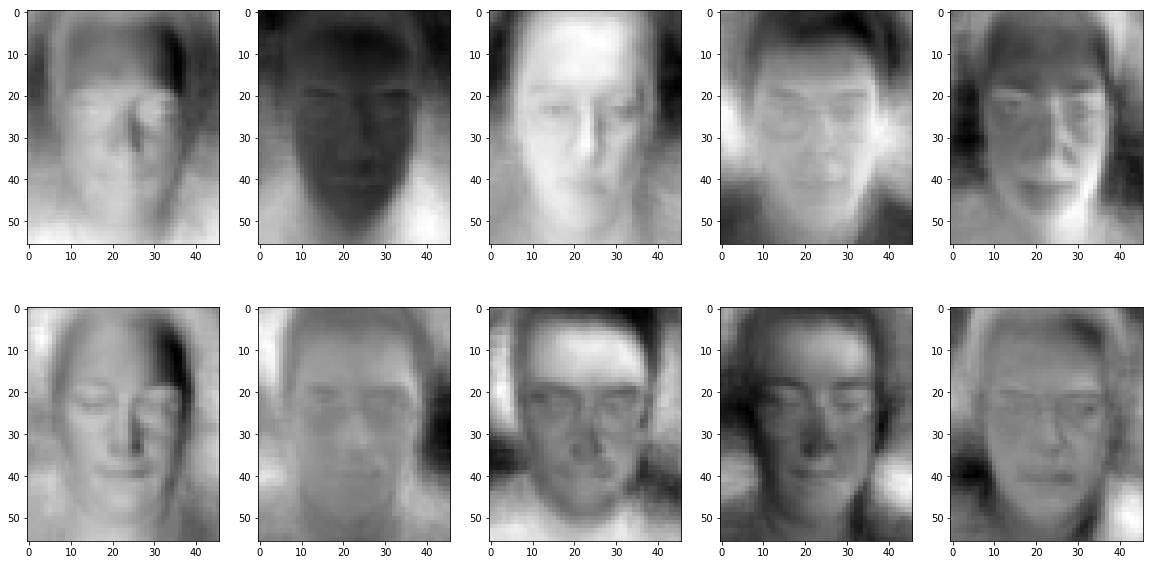

In [164]:
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_vector      = M_eig_pairs[ i ][ 1 ]
    eigen_vector_real = eigen_vector.real
    eigen_face_img    = np.reshape( eigen_vector_real, ( 46, 56 ) )
    
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()
fig.savefig("Q1HD.png")

In [165]:
print( 'Shape of A: {}'.format( A.shape ) )

S_LD = 1/A.shape[ 1 ] * np.matmul( A.T, A )
LD_EigVal, LD_EigVec = np.linalg.eig( S_LD )

Shape of A: (2576, 364)


In [166]:
LD_eig_pairs = [ (np.abs( LD_EigVal[ i ] ), LD_EigVec[ :, i ] ) for i in range( len( LD_EigVal ) ) ]
LD_eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

len( LD_eig_pairs )

364

In [167]:
lst = []
ld_eig_vecs_sign = []

for i in range( len( LD_eig_pairs ) ):
    lst.append( np.dot(A, LD_eig_pairs[ i ][ 1 ] ) )
    
print( len( lst ))

for i in range( len( lst ) - 1 ):
    if( M_eig_pairs[ i ][ 1 ][ 0 ] < 0 and lst[ i ][ 0 ] > 0 ):
        ld_eig_vecs_sign.append( -1*lst[ i ] ) 
    elif( M_eig_pairs[ i ][ 1 ][ 0 ] > 0 and lst[ i ][ 0 ] < 0):
        ld_eig_vecs_sign.append( -1*lst[ i ] )
    else:
        ld_eig_vecs_sign.append( lst[ i ] )
        
print( len( ld_eig_vecs_sign ) )

364
363


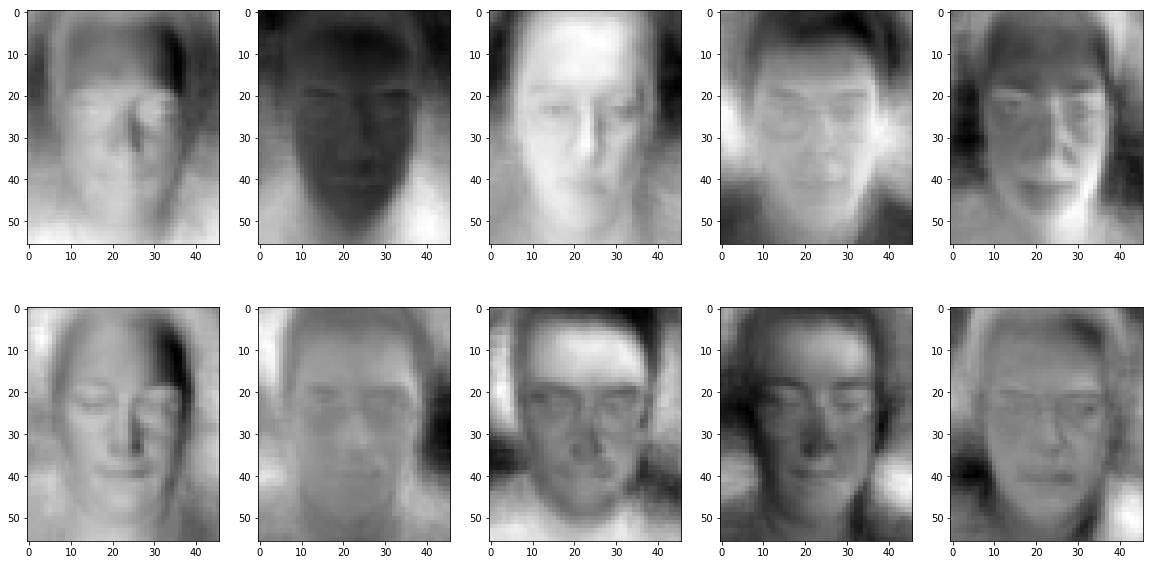

In [168]:
fig = plt.figure( figsize = ( 20, 10 ) )
for i in range( 10 ):
    eigen_vector      = ld_eig_vecs_sign[ i ]
    eigen_vector_real = eigen_vector.real
    norm = np.linalg.norm( eigen_vector_real )
    eigen_face = eigen_vector_real / norm
    eigen_face_img  = np.reshape( eigen_face, ( 46, 56 ) )
#     print( eigen_face / norm )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
plt.show()
fig.savefig("Q1LDSign.png")

In [169]:
A.shape 
train_label[ -1 : ]

A_labeled = np.vstack( ( A, train_label[ -1 : ] ) )

In [170]:
M = 400

ld_eig_vecs = np.asarray( ld_eig_vecs_sign[ : M ] )

print( ld_eig_vecs.shape )
print( A.shape )

data_subspace = np.dot( ld_eig_vecs, A )
print(data_subspace.shape)

(363, 2576)
(2576, 364)
(363, 364)


In [171]:
data_subspace_labeled = np.vstack( ( data_subspace, train_label[ -1 : ] ) )
print( data_subspace.shape )
print( data_subspace_labeled.shape )

(363, 364)
(364, 364)


## Testing

In [172]:
print(train_label.shape)
print(test_label.shape)

(2577, 364)
(2577, 156)


In [173]:
test_unlabeled = test_label[ : -1 ]
test_unlabeled.shape

(2576, 156)

In [174]:
test_unlabeled_0 = test_unlabeled[ : , 0 ]
test_unlabeled_0.shape

(2576,)

### Calculate W

In [175]:
# w = np.dot( test_unlabeled_0.T, ld_eig_vecs.T )
w = np.dot( ld_eig_vecs, test_unlabeled_0 )

w.shape

(363,)

In [176]:
error_matrix = []

for row in data_subspace.T:
     error_matrix.append( np.linalg.norm( w - row ) )
        
error_matrix = np.asarray( error_matrix )

error_matrix.shape

(364,)

In [177]:
error_matrix_labeled = error_matrix.reshape( error_matrix.shape[ 0 ], 1 )
error_matrix_labeled = error_matrix_labeled.T

error_matrix_labeled = np.vstack( ( error_matrix_labeled, train_label[ -1 : ] ) )

error_matrix_labeled.shape


(2, 364)

In [178]:
error_matrix_labeled.T.shape

(364, 2)

In [179]:
minIndex = np.argmin( error_matrix_labeled[ 0 ] )

predict = error_matrix_labeled[1][minIndex]

predict

45.0

In [180]:
test_label[2576][0]

2

# KNN 

In [181]:
print(train_label.shape)
print(test_label.shape)

(2577, 364)
(2577, 156)


In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [189]:
hd_eig_vecs = [ pair[ 1 ].real for pair in M_eig_pairs ]

In [194]:
#project Train Data to Omega Plane
M = 415
#eig_vecs = np.asarray( ld_eig_vecs_sign[ : M ] )
eig_vecs = np.asarray( hd_eig_vecs[ : M ] )


#subtract the mean face fro testing data
phi_mat_train = train_label[ : -1 ].astype( 'float64' )
for j in range(phi_mat_train.shape[1]):
    for i in range(phi_mat_train.shape[0]):
        phi_mat_train[i,j] = phi_mat_train[i,j] - mean_face[i]

X = np.dot( eig_vecs, phi_mat_train )

In [195]:
Y = train_label[ -1 : ].reshape( train_label[ -1 : ].shape[ 1 ], )
print(Y.shape,X.shape)
KNN = KNeighborsClassifier(n_neighbors = 1)

#Y needs to be 1 dim 
#Mpdel faces as Rows insetaed of Coloumn 
KNN.fit(X.T,Y)

(364,) (363, 364)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [196]:
#subtract the mean face fro testing data
phi_mat_test = test_label[ : -1 ].astype( 'float64' )
for j in range(phi_mat_test.shape[1]):
    for i in range(phi_mat_test.shape[0]):
        phi_mat_test[i,j] = phi_mat_test[i,j] - mean_face[i]

A_Test = phi_mat_test
#project Test Data to Omega Place
X_Test = np.dot( eig_vecs, A_Test )
Y_Test = test_label[ -1 : ].reshape( test_label[ -1 : ].shape[ 1 ], )
print(X_Test.shape)
print(Y_Test.shape)

(363, 156)
(156,)


In [197]:
#NN Classification
Y_Test_Predicted = KNN.predict(X_Test.T)
#Correct Rate
PC = (np.sum(Y_Test == Y_Test_Predicted)/Y_Test.shape[0])
print(PC)
CM = confusion_matrix(Y_Test, Y_Test_Predicted)

0.5705128205128205


# Alternative NN Methods

In [188]:
#divided into classes
for i in train_label[train_label.shape[1], ] 

SyntaxError: invalid syntax (<ipython-input-188-58458232c43e>, line 2)